## AdquisiciÃ³n y preprocesamiento de la informaciÃ³n

<table>
    <tr>
      <td>Grado en IngenierÃ­a de Datos e Inteligencia Artificial - Facultad de InformÃ¡tica - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>



### PrÃ¡ctica 9 -SoluciÃ³n


Ejecutar el siguiente cÃ³digo para instalar la biblioteca `missingno`. Tras hacerlo conviene reiniciar el entorno Jupyter

In [153]:
modules = ["missingno"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando mÃ³dulos")
    for m in modules:
        torch_loader = importlib.util.find_spec(m)
        if torch_loader is not None:
              print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("Â¡hecho!")
            except:
                print("Â¡Problema al instalar ",m,"! Â¿seguro que el mÃ³dulo existe?",sep="")

    print("Â¡Terminado, quizÃ¡s haya que hacer Restart!")

instala(modules)  

Instalando mÃ³dulos
missingno  encontrado
Â¡Terminado, quizÃ¡s haya que hacer Restart!


**Ejercicio 1**

Leer en un dataframe `df` el fichero csv alojado en 

"https://github.com/RafaelCaballero/tdm/raw/master/datos/tusa2020bcsv.zip"

Teniendo en cuenta que:

1.- La columna `created_at` debe ser leÃ­da como una fecha

2.- Las columnas `_id`,`userid`, `RT_source` deben ser leÃ­das como un string


Notas: En [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html):
* La opciÃ³n `parse_dates`  permite leer fechas
* La opciÃ³n `dtype`  nos permitirÃ¡ indicar que `_id`,`userid`, `RT_source` son de tipo `str`

In [154]:
import pandas as pd
url="https://github.com/RafaelCaballero/tdm/raw/master/datos/tusa2020bcsv.zip"

df = pd.read_csv(url, parse_dates=['created_at'],dtype={'_id':str, 'userid': str, 'RT_source': str})


# para probar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   _id             8223 non-null   object             
 1   text            4126 non-null   object             
 2   userid          8223 non-null   object             
 3   screen_name     8223 non-null   object             
 4   created_at      8223 non-null   datetime64[ns, UTC]
 5   lang            4126 non-null   object             
 6   quote_count     4126 non-null   float64            
 7   reply_count     4126 non-null   float64            
 8   retweet_count   4126 non-null   float64            
 9   favorite_count  4126 non-null   float64            
 10  coordinates     0 non-null      float64            
 11  reply           4126 non-null   object             
 12  quote           4110 non-null   object             
 13  RT              8223 non-null   b

In [155]:
# para probar
df.head()

_id                                               text  \
0  1322162444786126848                      Winners attract other winners   
1  1316829358686834688  NOW WE KNOW...C-SPAN Steve Sculley tried to ri...   
2  1318888111699599362                                                NaN   
3  1321483993922023424             @realDonaldTrump Vote BidenðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠ   
4  1313626566694404096                                                NaN   

                userid      screen_name                created_at lang  \
0            289706821      thatguy0603 2020-10-30 13:04:26+00:00   en   
1  1116507977828175872   FloridaDude297 2020-10-15 19:52:39+00:00   en   
2  1290009888580657152          why_inn 2020-10-21 12:13:24+00:00  NaN   
3   922851359594033152    Janet06969062 2020-10-28 16:08:30+00:00   fr   
4           3285934814  Bill4TruthTrump 2020-10-06 23:45:54+00:00  NaN   

   quote_count  reply_count  retweet_count  favorite_count  coordinates  \
0          0.0          0.0            0.0             0.0          NaN   
1         12.0         28.0          681.0          1232.0          NaN   
2          NaN          NaN            NaN             NaN          NaN   
3          0.0          0.0            0.0             0.0          NaN   
4          NaN          NaN            NaN             NaN          NaN   

   reply  quote     RT            RT_source  nRTin  
0  False   True  False                  NaN    0.0  
1  False  False  False                  NaN    0.0  
2    NaN    NaN   True  1318884437258571777    NaN  
3   True  False  False                  NaN    0.0  
4    NaN    NaN   True  1313617592125448194    NaN

Metadatos: 

    _id: identificador del tweet, es Ãºnico
    text: texto del tweet
    userid: identificador del usuario, se puede repetir porque el mismo usuario puede tener varios tweets           
    screen_name: nombre en twitter del usuario
    created_at: fecha de emisiÃ³n del tweet
    lang: idioma del tweet
    quote_count, reply_count, retweet_count, favorite_count: nÃºmero de citas, respuestas, retweets y marcas como favorito de este tweet, respectivamente
    coordinates: coordenadas desde las que se emitiÃ³
    reply: True si el tweet es un reply, False en otro caso
    quote: True si el tweet es una cita, False en otro caso
    RT: True si el tweet es un retweet, False en otro caso
    RT_source: Si RT==True  indica el `_id` del tweet original             
    nRTin: nÃºmero de retweets del tweet incluÃ­dos en este conjunto

**Ejercicio 2** 

a) A partir de `df.info()`seleccionar una columna candidata para ser borrada y borrarla. El resultado debe quedar en un dataframe `df2`

In [156]:
df2 = df.drop(columns=["coordinates"])

# para probar
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   _id             8223 non-null   object             
 1   text            4126 non-null   object             
 2   userid          8223 non-null   object             
 3   screen_name     8223 non-null   object             
 4   created_at      8223 non-null   datetime64[ns, UTC]
 5   lang            4126 non-null   object             
 6   quote_count     4126 non-null   float64            
 7   reply_count     4126 non-null   float64            
 8   retweet_count   4126 non-null   float64            
 9   favorite_count  4126 non-null   float64            
 10  reply           4126 non-null   object             
 11  quote           4110 non-null   object             
 12  RT              8223 non-null   bool               
 13  RT_source       4097 non-null   o

b) Utilizar la biblioteca `missingno` para mostrar grÃ¡ficamente la matriz de nulos (mÃ©todo matrix) en `df2`

<Axes: >

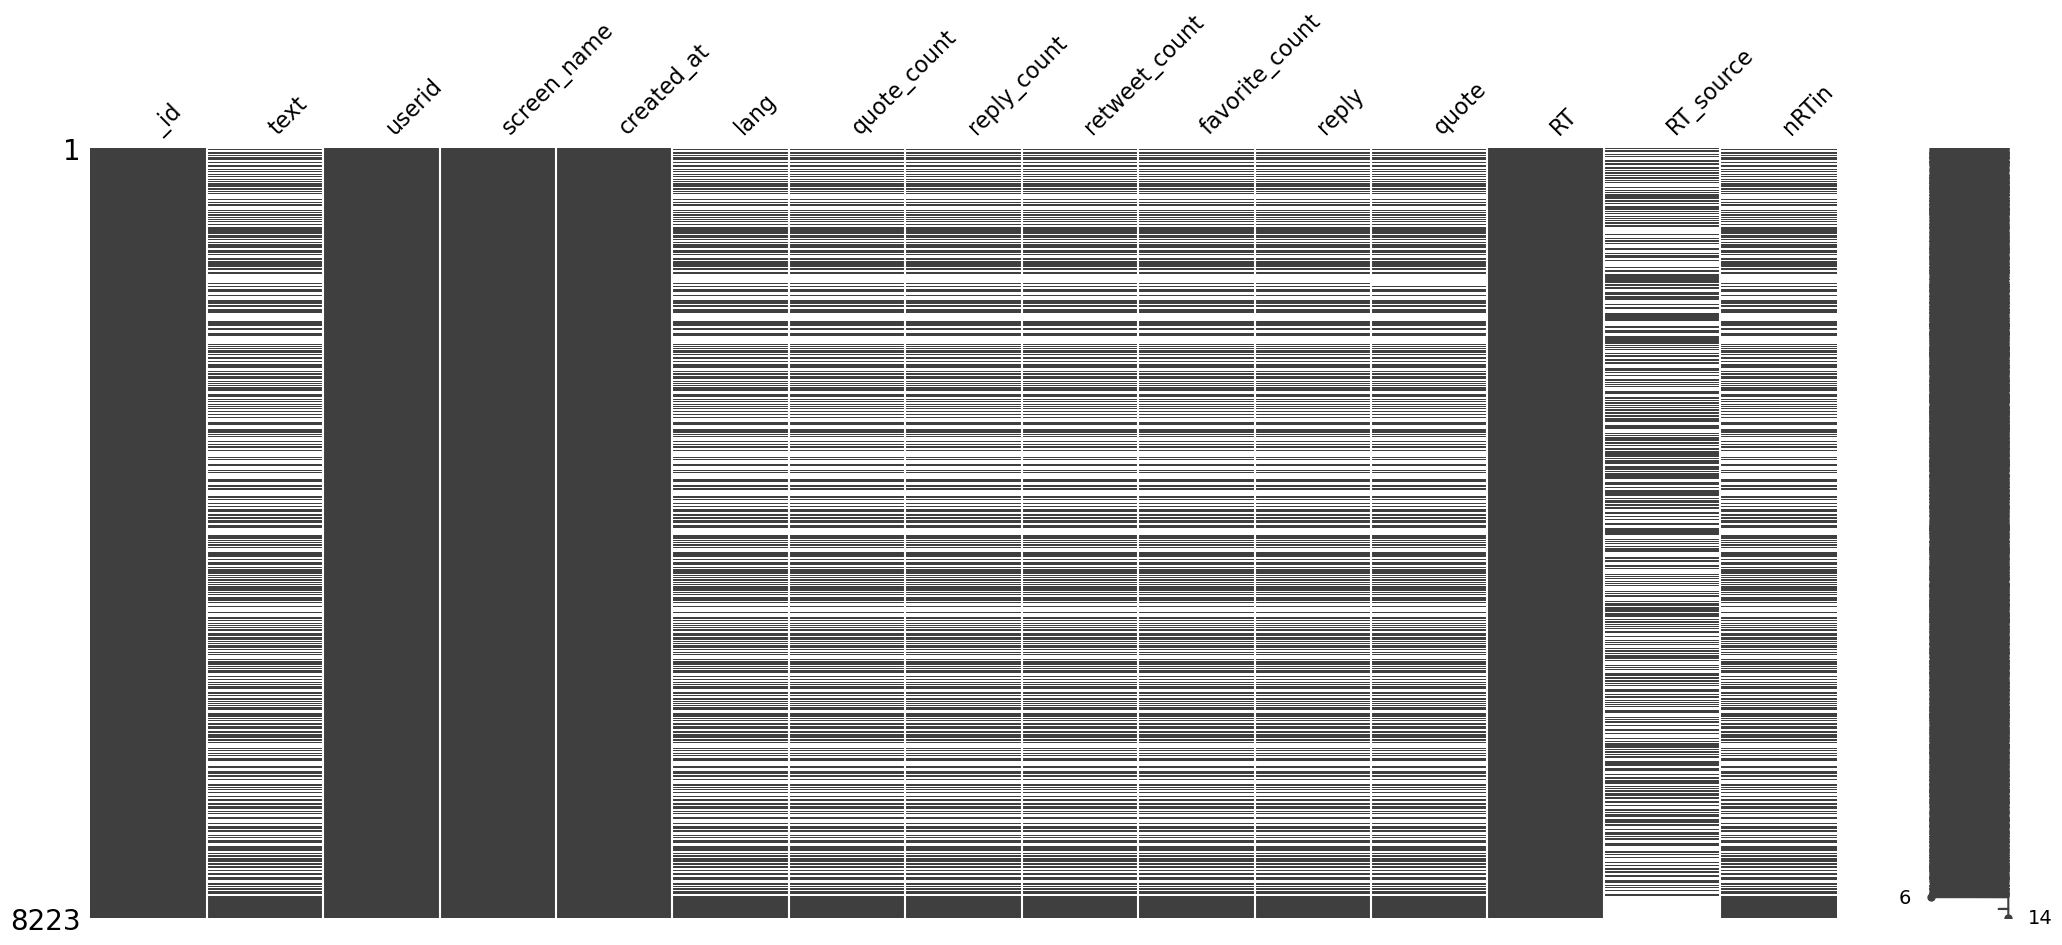

In [157]:
import missingno as msno
%matplotlib inline

# soluciÃ³n
msno.matrix(df2)

Â¿Extraes alguna conclusiÃ³n  a partir de la matriz? (no hace falta que sea una certeza, solo escribir si algo nos llama la atenciÃ³n). Una o 2 frases deben bastar

Comentario:



**Ejercicio 3** 

Escribir una funciÃ³n `columnas_con_nulos` con las siguientes caracterÃ­sticas:

- Nombre: columnas_con_nulos
- ParÃ¡metros: df, un dataframe
- Salida: lista con los nombres de columnas de df que tienen algÃºn nulo

Nota: si se usan bucles for la pregunta puntÃºa sobre 0.5



In [158]:
# soluciÃ³n

# Alternativa df.dropna(axis=1,how="any")

def columnas_con_nulos(df):    
    filtro = (df.isna().sum() > 0) # o df.isna().any()
    colnulos = df.columns[filtro]
    return colnulos
    

# para probar
colnulos = columnas_con_nulos(df2)
colnulos

Index(['text', 'lang', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count', 'reply', 'quote', 'RT_source', 'nRTin'],
      dtype='object')

**Ejercicio 4** De nuevo con la biblioteca `msno` mostrar un heatmap de las columnas de df2 que tienen algÃºn nulo, representadas por la variable `colnulos` dada a continuaciÃ³n

<Axes: >

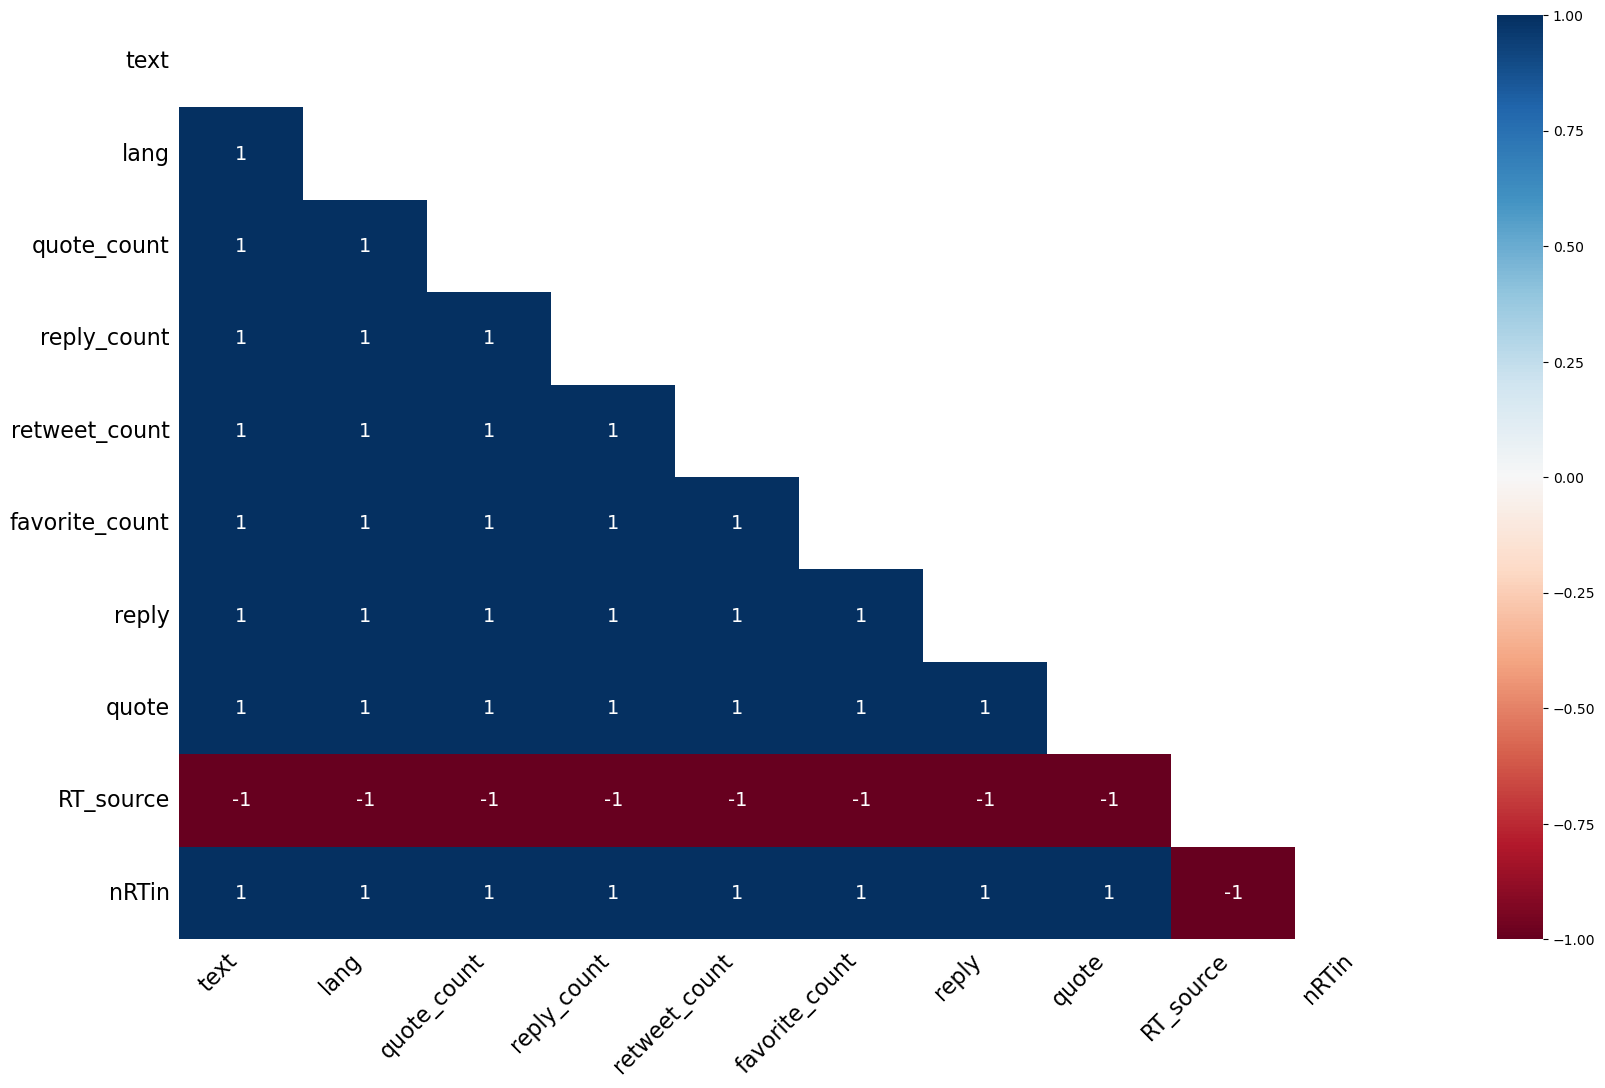

In [159]:
colnulos = ['text', 'lang', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count', 'reply', 'quote', 'RT_source', 'nRTin']

# soluciÃ³n
msno.heatmap(df2[colnulos])

Â¿QuÃ© conclusiÃ³n sacas? Una o dos frases deben bastar 

**Ejercicio 5** 

Vamos a dividir `df2` en dos dataframes: `df_original` que solo tiene tweets que tengan `RT` a False, y `df_RT`que solo tenga filas que tengan `RT`a True.  Observar que es una particiÃ³n del dataframe ya que RT no tiene nulos y solo toma los valores True y False

In [160]:
# soluciÃ³n
df_original = df2[~df2.RT]
df_RT = df2[df2.RT]

In [161]:
# para probar
print(len(df2), len(df_RT)+len(df_original))
df_original.info()

8223 8223
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 0 to 8222
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   _id             4126 non-null   object             
 1   text            4126 non-null   object             
 2   userid          4126 non-null   object             
 3   screen_name     4126 non-null   object             
 4   created_at      4126 non-null   datetime64[ns, UTC]
 5   lang            4126 non-null   object             
 6   quote_count     4126 non-null   float64            
 7   reply_count     4126 non-null   float64            
 8   retweet_count   4126 non-null   float64            
 9   favorite_count  4126 non-null   float64            
 10  reply           4126 non-null   object             
 11  quote           4110 non-null   object             
 12  RT              4126 non-null   bool               
 13  RT_source       0 non-n

In [162]:
# para probar
df_RT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4097 entries, 2 to 7999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   _id             4097 non-null   object             
 1   text            0 non-null      object             
 2   userid          4097 non-null   object             
 3   screen_name     4097 non-null   object             
 4   created_at      4097 non-null   datetime64[ns, UTC]
 5   lang            0 non-null      object             
 6   quote_count     0 non-null      float64            
 7   reply_count     0 non-null      float64            
 8   retweet_count   0 non-null      float64            
 9   favorite_count  0 non-null      float64            
 10  reply           0 non-null      object             
 11  quote           0 non-null      object             
 12  RT              4097 non-null   bool               
 13  RT_source       4097 non-null   o

**Ejercicio 6** Decidir a partir del resultado de las llamadas a info() (y del sentido comÃºn) quÃ© columnas se pueden eliminar en cada caso. Eliminarlas dejando el resultado en el mismo dataframe.

Nota: 
- No borrar "_id", "userid" o "screen_name", vamos a utlizarlas mÃ¡s adelante
- se pueden escribir los nombres de las columnas explÃ­citamente ("a mano"), pero entonces el apartado vale 0.25 en lugar de 1, es preferible programar el criterio que se haya elegido para su eliminaciÃ³n


In [175]:
df.isna().all()

_id               False
text              False
userid            False
screen_name       False
created_at        False
lang              False
quote_count       False
reply_count       False
retweet_count     False
favorite_count    False
coordinates        True
reply             False
quote             False
RT                False
RT_source         False
nRTin             False
dtype: bool

In [163]:
# soluciÃ³n

# alternativa seguramente mÃ¡s sencilla y elegante: df.dropna(axis=1,how="all")
def columnas_todo_nulos(df):    
    filtro = (df.isna().sum()== df.shape[0]) # df.isna().all()
    colnulos = df.columns[filtro]
    return colnulos

def columnas_unsolovalor(df):    
    unosolo = []
    for c in df:
        n= len(df[c].unique())
        if n==1:
            unosolo.append(c)
    return  unosolo

    
df_RT = df_RT.drop(columns=list(columnas_todo_nulos(df_RT)) + list(columnas_unsolovalor(df_RT)))
df_original = df_original.drop(columns=list(columnas_todo_nulos(df_original)) + list(columnas_unsolovalor(df_original)))

In [164]:
# para probar
df_RT.head()

_id               userid      screen_name  \
2  1318888111699599362  1290009888580657152          why_inn   
4  1313626566694404096           3285934814  Bill4TruthTrump   
5  1323494450883166208   897848315752071169    HamilBaltisar   
6  1312583721090867200            247903672   mike4libertyCA   
7  1315739228869808128  1288936715793571840       RichCrowe5   

                 created_at            RT_source  
2 2020-10-21 12:13:24+00:00  1318884437258571777  
4 2020-10-06 23:45:54+00:00  1313617592125448194  
5 2020-11-03 05:17:21+00:00  1323467682671415302  
6 2020-10-04 02:42:00+00:00  1312560078717943809  
7 2020-10-12 19:40:52+00:00  1315736794982281224

In [165]:
# para probar
df_original.head()

_id                                               text  \
0   1322162444786126848                      Winners attract other winners   
1   1316829358686834688  NOW WE KNOW...C-SPAN Steve Sculley tried to ri...   
3   1321483993922023424             @realDonaldTrump Vote BidenðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠ   
9   1313497108566011905           @realDonaldTrump https://t.co/uU7arNqAKK   
10  1314650690866741248  @Johnny_Congress @SugengHaryono70 @TeamTrump @...   

                 userid     screen_name                created_at lang  \
0             289706821     thatguy0603 2020-10-30 13:04:26+00:00   en   
1   1116507977828175872  FloridaDude297 2020-10-15 19:52:39+00:00   en   
3    922851359594033152   Janet06969062 2020-10-28 16:08:30+00:00   fr   
9    941136678369968129   Trump_4Prison 2020-10-06 15:11:28+00:00  und   
10   940807712161587200       GjsgloBug 2020-10-09 19:35:24+00:00   en   

    quote_count  reply_count  retweet_count  favorite_count  reply  quote  \
0           0.0          0.0            0.0             0.0  False   True   
1          12.0         28.0          681.0          1232.0  False  False   
3           0.0          0.0            0.0             0.0   True  False   
9           0.0          0.0            0.0             0.0   True  False   
10          0.0          0.0            0.0             0.0   True  False   

    nRTin  
0     0.0  
1     0.0  
3     0.0  
9     0.0  
10    0.0

**Ejercicio 7**  Queremos saber quÃ© proporciÃ³n de elementos de `df_RT` son retweet de un elemento en `df_original`, es decir cumplen que 
`df_RT["RT_source"]` aparece entre los `df_original["_id"]`. Escribir un fragmento de cÃ³digo que muestre esta proporciÃ³n como tanto por ciento con dos decimales

In [166]:
len(df_RT.merge(df_original, left_on="RT_source", right_on='_id'))

318

In [167]:
round(100*len(df_RT.merge(df_original, left_on="RT_source", right_on='_id'))/len(df_RT),2)

7.76

**Ejercicio 8** Queremos eliminar de `df_original` las filas que corresponan a lenguajes que aparezcan menos de 10 veces en este dataframe. Dejar el resultado `df_original_lang`

Ayuda: 

- El mÃ©todo df.c.value_counts() devuelve un valor de tipo Series donde el Ã­ndice (index) es el cada valor distinto de c, ordenado de mÃ¡s a menos frecuente, y el valor es dicha frecuencia
- El mÃ©todo df.c.isin(l) devuelve True para aquellos valores de c que estÃ©n en la lista l, y False en caso contrario

In [171]:
# soluciÃ³n
valores = df_original.lang.value_counts()
filtro10 = valores>10
langs = valores[filtro10].index
df_original_lang = df_original[df_original.lang.isin(langs)] # tambiÃ©n se podrÃ­a con merge

# para probar
df_original_lang.lang.value_counts()

en     3336
und     610
es       43
fr       26
pt       20
Name: lang, dtype: int64

**Ejercicio 9** En `df_original_lang` (o en `df_original` si no se ha hecho el ejercicio anterior) reemplazar la columna `lang` por su conversiÃ³n a datos numÃ©ricos mediante la tÃ©cnica *one-hot encoding*. El resultado serÃ¡ un dataframe `df_onehot `.

In [172]:
from sklearn.preprocessing import OneHotEncoder
df_original_lang = df_original_lang.reset_index() # para evitar problemas de Ã­ndices
df_original = df_original.reset_index()

# soluciÃ³n
a_transformar = df_original_lang[["lang"]]
enc = OneHotEncoder(sparse_output=False)  # 1 mÃ©todo
enc.fit(a_transformar)  #  2 el mÃ©todo "aprende"
salida = enc.transform(a_transformar) # 3 aplicamos el mÃ©todo
encoded_df = pd.DataFrame(salida,   columns=enc.get_feature_names_out())
df_onehot = pd.concat([df_original_lang,encoded_df],axis=1)
df_onehot = df_onehot.drop(columns="lang")

# para probar 
print(df_onehot.shape)
print(df_onehot.columns)
df_onehot.head()

(4035, 18)
Index(['index', '_id', 'text', 'userid', 'screen_name', 'created_at',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'reply', 'quote', 'nRTin', 'lang_en', 'lang_es', 'lang_fr', 'lang_pt',
       'lang_und'],
      dtype='object')


index                  _id  \
0      0  1322162444786126848   
1      1  1316829358686834688   
2      3  1321483993922023424   
3      9  1313497108566011905   
4     10  1314650690866741248   

                                                text               userid  \
0                      Winners attract other winners            289706821   
1  NOW WE KNOW...C-SPAN Steve Sculley tried to ri...  1116507977828175872   
2             @realDonaldTrump Vote BidenðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠðŸŒŠ   922851359594033152   
3           @realDonaldTrump https://t.co/uU7arNqAKK   941136678369968129   
4  @Johnny_Congress @SugengHaryono70 @TeamTrump @...   940807712161587200   

      screen_name                created_at  quote_count  reply_count  \
0     thatguy0603 2020-10-30 13:04:26+00:00          0.0          0.0   
1  FloridaDude297 2020-10-15 19:52:39+00:00         12.0         28.0   
2   Janet06969062 2020-10-28 16:08:30+00:00          0.0          0.0   
3   Trump_4Prison 2020-10-06 15:11:28+00:00          0.0          0.0   
4       GjsgloBug 2020-10-09 19:35:24+00:00          0.0          0.0   

   retweet_count  favorite_count  reply  quote  nRTin  lang_en  lang_es  \
0            0.0             0.0  False   True    0.0      1.0      0.0   
1          681.0          1232.0  False  False    0.0      1.0      0.0   
2            0.0             0.0   True  False    0.0      0.0      0.0   
3            0.0             0.0   True  False    0.0      0.0      0.0   
4            0.0             0.0   True  False    0.0      1.0      0.0   

   lang_fr  lang_pt  lang_und  
0      0.0      0.0       0.0  
1      0.0      0.0       0.0  
2      1.0      0.0       0.0  
3      0.0      0.0       1.0  
4      0.0      0.0       0.0

**Ejercicio 10** (DifÃ­cil) En principio a cada  `userid` le deberÃ­a corresponde un 'screen_name', pero sospechamos que no es asÃ­. Escribir cÃ³digo para mostrar la cantidad de `userid`s que tienen asociado mÃ¡s de un 'screen_name' en `df_original`. No se pueden utilizar bucles for ni listas intensionales

In [173]:
import numpy as np
df_num_screen_name = df_original.pivot_table(index='userid', values='screen_name', aggfunc=lambda x: len(set(x)))
filtro = df_num_screen_name.screen_name>1
sum(filtro)

1

In [174]:
df_original[df_original["userid"]=="1157388784301793280"]

index                  _id  \
3977   8074  1319062581298876416   
4074   8171  1314052650204164096   
4118   8215  1313923308916600832   

                                                   text               userid  \
3977  THREAD\n\nObama went out to berate @realDonald...  1157388784301793280   
4074  THREAD\n\nYou know what's funny, @realDonaldTr...  1157388784301793280   
4118  THREAD\n\nAs I always say, @realDonaldTrump an...  1157388784301793280   

     screen_name                created_at lang  quote_count  reply_count  \
3977    Bertoldo 2020-10-21 23:46:41+00:00   en          0.0          0.0   
4074     Aniceto 2020-10-08 03:59:00+00:00   en          0.0          0.0   
4118     COsweda 2020-10-07 19:25:03+00:00   en          0.0          0.0   

      retweet_count  favorite_count  reply  quote  nRTin  
3977            0.0             0.0  False  False  632.0  
4074            1.0             1.0  False  False  335.0  
4118            0.0             0.0  False  False  412.0